# Evaluating the Schrodinger Equation

QWavE was developed to evaluate the Schrodinger Equation using a fourth-order finite difference discretization for simple and arbitrary potentials. Currently, only 1-dimensional potentials are implimented.

## schrodinger_box()

The schrodinger_solution.() module evaluates problems of the form:

$$[\frac{-h^{2}}{8\pi^{2}m}\nabla^{2} + V(x)]\psi(x) = E\psi(x)$$
or
$$[\frac{-1}{2m}\nabla^{2} + V(x)]\psi(x) = E\psi(x)$$ in a.u.

where we force the wavefunction $\Psi(x)$ to vanish along at the boundaries of a 1 dimensional box ($\Psi(-L/2)=\Psi(L/2)=0$). 

The potential V(x) must be finite at all values of x within the box and for convience, the box is centered at 0 bohr. In principle this does not need to be the case but from a pedagogical point of view we have choosen this convention to evaluate the Schrodinger equation

schrodinger_solution() takes at minimum two arguments for the particle in a box problem:

<br>&emsp;&emsp;    box_length and mass (each in atomic units)
<br>    
If these are the only two paramters specified, schrodinger_solution() will evaluate the schrodinger equation for a particle of mass "mass", in box with length "box_length". The box has an infinite potential at the boundaries and no potential within the box. schrodinger_solution() will return two arrayss, which are the eigenvalues and wavefunctions of the particle in a box.

In [1]:
import qwave
from scipy import constants
import numpy as np

# import some constants
h = constants.h/(2*np.pi) # planck constant
bohr_m = constants.physical_constants['Bohr radius'][0] # convert borh radius in meters
au_kg = constants.physical_constants['atomic unit of mass'][0]  # convert from au to kg
hartree_j = constants.physical_constants['Hartree energy'][0] # convert hartree to J

bl = 10    # bohr
m = 1      # a.u of mass
eigen,wave = qwave.schrodinger_solution(bl, m, problem='box')
print('The schrodinger_solution() module predicts that the first eigenstate of a particle of mass',
      m, 
      'a.u. and box length of',
      bl,
      'bohr is: {0:.5f} Hartree or {1:.3e} Joules'.format(eigen[0],eigen[0]*hartree_j))

## We can check out work by computing the Energy of a particle in a box by hand

L = 10 * bohr_m
m = 1 * au_kg
n = 1
print(' ')
En = ((n**2)*(np.pi**2)*(h)**2)/(2*m*(L**2))#*(1/hartree_j)
print('The analytical solution for a particle of mass',
      m, 
      'a.u. in a box of', 
      bl, 
      'bohr is {0:.5f} Hartree or {1:.3e} Joules'.format(En*(1/hartree_j),En))
print(' ')

error = np.abs((eigen[0] - En*(1/hartree_j)) / (En*(1/hartree_j)))*100
print('The error in the schrodinger_solution module is approximately {0:.2f}%'.format(error))


The schrodinger_solution() module predicts that the first eigenstate of a particle of mass 1 a.u. and box length of 10 bohr is: 0.04853 Hartree or 2.116e-19 Joules
 
The analytical solution for a particle of mass 9.1093837015e-31 a.u. in a box of 10 bohr is 0.04935 Hartree or 2.151e-19 Joules
 
The error in the schrodinger_solution module is approximately 1.65%


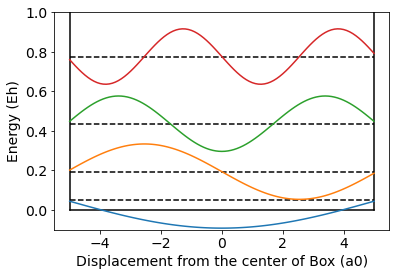

In [2]:
# Plot the eigen values and wave functions from the Schrodinger_box() module
import matplotlib.pyplot as plt
import numpy as np

# Create Box
plt.plot(np.linspace(1*bl/2,1*bl/2,101),np.linspace(0,10,101),color='black')
plt.plot(np.linspace(-1*bl/2,-1*bl/2,101),np.linspace(0,10,101),color='black')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(0,0,101),color='black')

# Plot first four eigen values
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[0],eigen[0],101),color='black',linestyle='dashed')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[1],eigen[1],101),color='black',linestyle='dashed')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[2],eigen[2],101),color='black',linestyle='dashed')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[3],eigen[3],101),color='black',linestyle='dashed')

# Plot the wavefunctions of the first four eigen states
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[0])
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[1])
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[2])
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[3])
plt.ylim([-0.1,1])
plt.ylabel('Energy (Eh)',size=14)
plt.xlabel('Displacement from the center of Box (a0)',size=14)
plt.xticks(size=14)
plt.yticks(size=14)

plt.show()


schrodinger_box has a total of 6 parameters it can take:
<br>    box_length: 
<br> &emsp;&emsp;      length of box in a.u.
<br>     mass:
<br> &emsp;&emsp;        mass of particle in a.u.
<br>    pot_func:
<br> &emsp;&emsp;        evaluate the S.E. for a potential within the box:
<br> &emsp;&emsp;&emsp;&emsp;            pot_func = 'PIAB (default) - particle in a box
<br> &emsp;&emsp;&emsp;&emsp;            pot_func = 'PARA - particle in a parabola
<br> &emsp;&emsp;&emsp;&emsp;            pot_func = <path to csv file> - particle in an arbitrary potential (described below)
<br>    grid_points:
<br> &emsp;&emsp;        defines the number of grid point to evaluate the S.E. (default = 101)
<br>     len_eigval:
<br> &emsp;&emsp;        defines number of eigenvalues to show (default = 10)
<br>     fit_type:
<br> &emsp;&emsp;        an option based to scipy.interpolate used to interpolate the potential supplied by pot_func


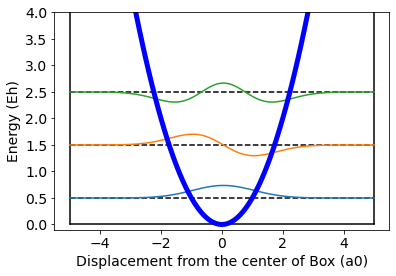

In [3]:
# Solve the schrodinger equation for a parabolic potential in the box
bl = 10     # bohr
m = 1      # a.u of mass
eigen,wave = qwave.schrodinger_solution(bl,m,
                                   pot_func='PARA',
                                   len_eigval = 3,
                                   problem='box')

# Create Box
plt.plot(np.linspace(1*bl/2,1*bl/2,101),np.linspace(0,10,101),color='black')
plt.plot(np.linspace(-1*bl/2,-1*bl/2,101),np.linspace(0,10,101),color='black')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(0,0,101),color='black')

# Plot first four eigen values
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[0],eigen[0],101),color='black',linestyle='dashed')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[1],eigen[1],101),color='black',linestyle='dashed')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[2],eigen[2],101),color='black',linestyle='dashed')

# Plot the wavefunctions of the first four eigen states
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[0])
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[1])
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[2])
plt.ylim([-0.1,4])
plt.ylabel('Energy (Eh)',size=14)
plt.xlabel('Displacement from the center of Box (a0)',size=14)
plt.xticks(size=14)
plt.yticks(size=14)

# Pot the potential PARA evaluates
xline= np.linspace(-1*bl/2,bl/2,101)
V_para = 0.5*(xline**2) # this is the potential evaluated when the pot_func=PARA option is choosen
plt.plot(xline,V_para,color='blue',linewidth=5)

plt.show()

## schrodinger_solution(problem='box') with an arbitrary potential

schrodinger_solution() can also read the input from a csv file and evalute the schrodinger equation by interpolating between the points in the csv. The potential should be confined within the box. The maximum box length you select should be the difference between the first and last $x$ value. the CSV file provided evaluates the same potential predicted by setting 'pot_func = PARA' as above. All csv files should be formated in the same manner.

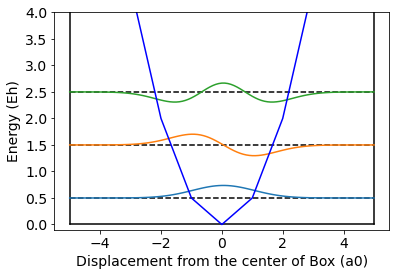

In [4]:
import csv

csv_file = './quadratic.csv' # this csv file represents an arbitary potential supplied but happens to be the same potential as above

# get the data out of the csv file for plotting
xdata = []
ydata = []

with open(csv_file) as csvfile:
    spamreader = csv.reader(csvfile,delimiter = ',')
    for row in spamreader:
        xdata.append(float(row[0]))
        ydata.append(float(row[1]))

bl = 10     # bohr
m = 1       # a.u of mass
eigen,wave = qwave.schrodinger_solution(bl,m,
                                   pot_func=csv_file, 
                                   len_eigval = 3,
                                   problem='box') 

# Create Box
plt.plot(np.linspace(1*bl/2,1*bl/2,101),np.linspace(0,10,101),color='black')
plt.plot(np.linspace(-1*bl/2,-1*bl/2,101),np.linspace(0,10,101),color='black')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(0,0,101),color='black')

# Plot first four eigen values
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[0],eigen[0],101),color='black',linestyle='dashed')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[1],eigen[1],101),color='black',linestyle='dashed')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[2],eigen[2],101),color='black',linestyle='dashed')

# Plot the wavefunctions of the first four eigen states
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[0])
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[1])
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[2])
plt.ylim([-0.1,4])
plt.ylabel('Energy (Eh)',size=14)
plt.xlabel('Displacement from the center of Box (a0)',size=14)
plt.xticks(size=14)
plt.yticks(size=14)

        
xline = np.array(xdata)
V_para = np.array(ydata)
plt.plot(xline,V_para,color='blue') # Note: the plot is not smooth because we did not use an interpolation of the points in the csv file when making the potential
                                    # If a smooth line is desired than interpolate the data in the csv file with scipy.interpolate.CubicSpline as the schrodinger_box() module has
plt.ylim([-0.1,4])
plt.show()

As you can see, we get the same answer whether we use the predefined potential or the interpolated potential

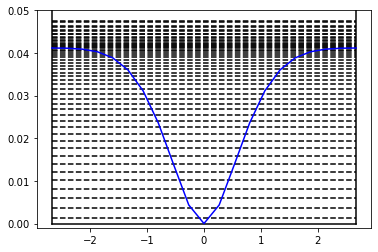

In [5]:
# Next, a csv file that is representative of an arbitrary potential
# NOTE:
# This csv file is representative of an adsorbate translating across a surface
# The methods used to obtain this potential can be found at doi:(TBD) 
# The csv file is in Angstroms and eV so we need to read the original csv and write a new one with the correct units


# Get some physical constants to manipulate the data
bohr_to_m = constants.physical_constants['Bohr radius'][0] # convert from bohr to meter
ang_to_m = constants.physical_constants['Angstrom star'][0] # convert from angstrom to meter

au_to_kg = constants.physical_constants['atomic unit of mass'][0]  # convert from au to kg
am_to_kg = constants.physical_constants['atomic mass constant'][0] # convert from am to kg

h_to_eV = constants.physical_constants['Hartree energy in eV'][0] # convert from Eh to eV

x=[] # store data in csv
y=[]

# Create a new CSV with the correct units
with open('./arbitrary.csv') as csvfile:                # read csvfile
    csvreader = csv.reader( csvfile,delimiter =',')
    for row in csvreader:
        x.append(float(row[0]))
        y.append(float(row[1]))

xdata = np.multiply(x,(ang_to_m/bohr_to_m)) # modify the data so it is in atomic units
ydata = np.multiply(y,1/h_to_eV)

results = np.vstack((xdata,ydata)).T

np.savetxt('./scaled-arbitrary.csv', results,delimiter=',')

# Evaluate the Schrodinger Equation for this potential
bl = xdata[-1]-xdata[0]      # box length (centered at zero)
m = 12 * (am_to_kg/au_to_kg) # atomic unit of mass of C atom
eigen,wave = qwave.schrodinger_solution(bl,m,
                                   pot_func='./scaled-arbitrary.csv',
                                   len_eigval = 50,
                                   problem='box') # increase len_eigval to get as many eigenvalues as you desire

# Create Box
plt.plot(np.linspace(1*bl/2,1*bl/2,101),np.linspace(0,10,101),color='black')
plt.plot(np.linspace(-1*bl/2,-1*bl/2,101),np.linspace(0,10,101),color='black')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(0,0,101),color='black')

# Plot first four eigen values
for i in eigen:
    plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(i,i,101),color='black',linestyle='dashed')
        
xline = np.array(xdata)
V_para = np.array(ydata)
plt.plot(xline,V_para,color='blue') # Again, if you desire to [plot a smooth potential use scipy.interpolate.CubicSpline
plt.ylim([-0.001,.05])
plt.show()

As you can see, the potential is fairly harmonic near the center of the box, but dissopates as the potential flattens at ~1.75 Bohr

## schrodinger_solution(problem='HO')

schrodinger_HO() is a special function designed to evaluate the Harmonic oscillator problem. It works exactly like the schrodinger_box() module except this module takes a frequency and works backward to generate the harmonic potential, then evaluates that potential using the methods described above.
<br>
A couple of things to note:
<br> 
1) You must still work in atomic units.
<br>
2) You need to supply the frequency in cm$^{-1}$; the code will do the unit conversions for you
<br>
3) You still need to specify the box length, as it is needed to generate the grid points

In [6]:
# lets use some of the data above to make life easier

bl = xdata[-1]-xdata[0]      # box length (centered at zero)
m = 12 * (am_to_kg/au_to_kg) # atomic unit of mass of C atom
freq = 543                   # frequency in cm-1 (corresponds to C atom vibrating on a surface)


eigen_HO,wave_HO = qwave.schrodinger_solution(bl,
                                        m,
                                        frequency=freq, # now must specify frequency
                                        len_eigval = 10,
                                        problem='HO')

# We can compute the energy difference of the first two eigen values and we should get back our original frequencies 
h_to_eV = constants.physical_constants['Hartree energy in eV'][0] # convert from Eh to eV
eV_to_cm = 8065.544

Eig_1 = eigen_HO[0]*h_to_eV
Eig_2 = eigen_HO[1]*h_to_eV

print('The computed ground state frequency of this potential is: {0:.1f} cm^-1'.format((Eig_2-Eig_1)*eV_to_cm))


The computed ground state frequency of this potential is: 542.3 cm^-1


In theory, we can apply this to obtain anharmonic frequency corrections. We will show an example of this in a subsequent example. 

Hopefully this introductory notebook has familiarized you with the basic usage of QWavE. Please follow our other examples to do computions of thermodynamic quantities and statistics. If there are any bugs, issues or comments, please direct them to the authors at on the GitHub repository at https://github.com/cwaitt/QWavE.

Note: At the time this jupyter notebook has been released the QWavE code is still under developement. We will try to keep this notebook and others up to date with changes.